# Homework 3

## Enya Liu

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


       participants  nonparticipants
count     25.000000        22.000000
mean     410.079600       374.071818
std      121.513786       133.139285
min      210.990000       139.690000
25%      298.380000       296.392500
50%      424.940000       374.740000
75%      456.300000       445.557500
max      635.210000       688.770000


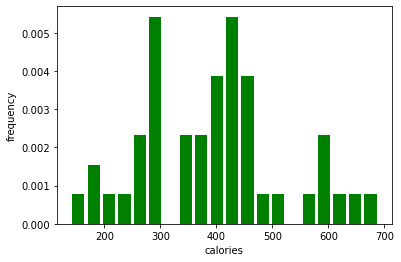

In [3]:
# Add your code or descriptions here 
# read the data
participant_data = pd.read_csv('participants.csv')
nonparticipant_data = pd.read_csv('nonparticipants.csv')

# my personal position
# participant_data = pd.read_csv(r'C:\Users\Ley\Desktop\participants.csv')
# nonparticipant_data = pd.read_csv(r'C:\Users\Ley\Desktop\nonparticipants.csv')

# create table to summarize
all_data = participant_data.merge(nonparticipant_data, left_on='participants', right_on = 'nonparticipants', how = 'outer')
all_data = all_data.describe()
# all_data=all_data.transpose()
print(all_data)

# draw histogram
tot_data = list(participant_data['participants']) + list(nonparticipant_data['nonparticipants'])

N, bins, patches=plt.hist(x=tot_data, bins = 20, density=True, histtype='bar', rwidth=0.8,color = 'green', label = 'participant')
plt.xlabel('calories')
plt.ylabel('frequency')
plt.show()

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [120]:
# Add your code or descriptions here 
# H0：Participants' mean calorie consumption = 425
# Ha: Participants' mean calorie consumption != 425
# Two sided, one sample t-test
# decision rule is reject when p-value <= 𝛼
from scipy.stats import t
from scipy.stats import ttest_1samp
# find critical value
t_critical = scipy.stats.t.ppf(q=0.975,df=24)
t_statistics = scipy.stats.ttest_1samp(a=participant_data, popmean=425, alternative = 'two-sided')
print(t_statistics)
print('Fail to reject the null hypothesis with a p-value greater than 𝛼')

Ttest_1sampResult(statistic=array([-0.61393857]), pvalue=array([0.54503195]))
Fail to reject the null hypothesis with a p-value greater than 𝛼


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [123]:
# Add your code or descriptions here 
t_critical = scipy.stats.t.ppf(q=0.95,df=24)
CI = scipy.stats.t.interval(alpha=0.90, df=len(participant_data)-1, loc=np.mean(participant_data), scale=scipy.stats.sem(participant_data)) 
print(CI)

(array([368.50044816]), array([451.65875184]))


# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [124]:
# Add your code or descriptions here 
# H0: calories of participants = calories of nonparticipants
# Ha: calories of participants > calories of nonparticipants
# 2 sample, 1 sided t-test
# decision rule is reject null if p-value <= 𝛼.
from scipy.stats import ttest_ind
result = scipy.stats.ttest_ind(a=participant_data, b=nonparticipant_data, alternative = 'greater')
print(result)
print('Failed to reject the null hypothesis because p-value greater than 𝛼')

Ttest_indResult(statistic=array([0.96935044]), pvalue=array([0.16877591]))
Failed to reject the null hypothesis because p-value greater than 𝛼
